In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE, MDS

In [44]:
def division_clusters(x, pendiente  = 1.5, ordenada = - 15):
    y = pendiente * x[:,0] + ordenada
    return np.where(x[:,1] > y, 1, 0)

In [45]:
random_seed = 333
np.random.seed(random_seed)

In [46]:
df = pd.read_csv('HeartAttack.csv')

In [47]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172
1316,45,1,85,168,104,96.0,1.24,4.250
1317,54,1,58,117,68,443.0,5.80,0.359


In [48]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
dtype: int64

In [49]:
df.dtypes

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
dtype: object

In [50]:
df.describe([0.01, 0.25, 0.50, 0.75,0.99])

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
1%,22.180000,0.000000,51.000000,76.000000,44.000000,67.180000,0.518340,0.003000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
99%,86.000000,1.000000,125.000000,208.000000,106.820000,420.740000,300.000000,5.984800
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


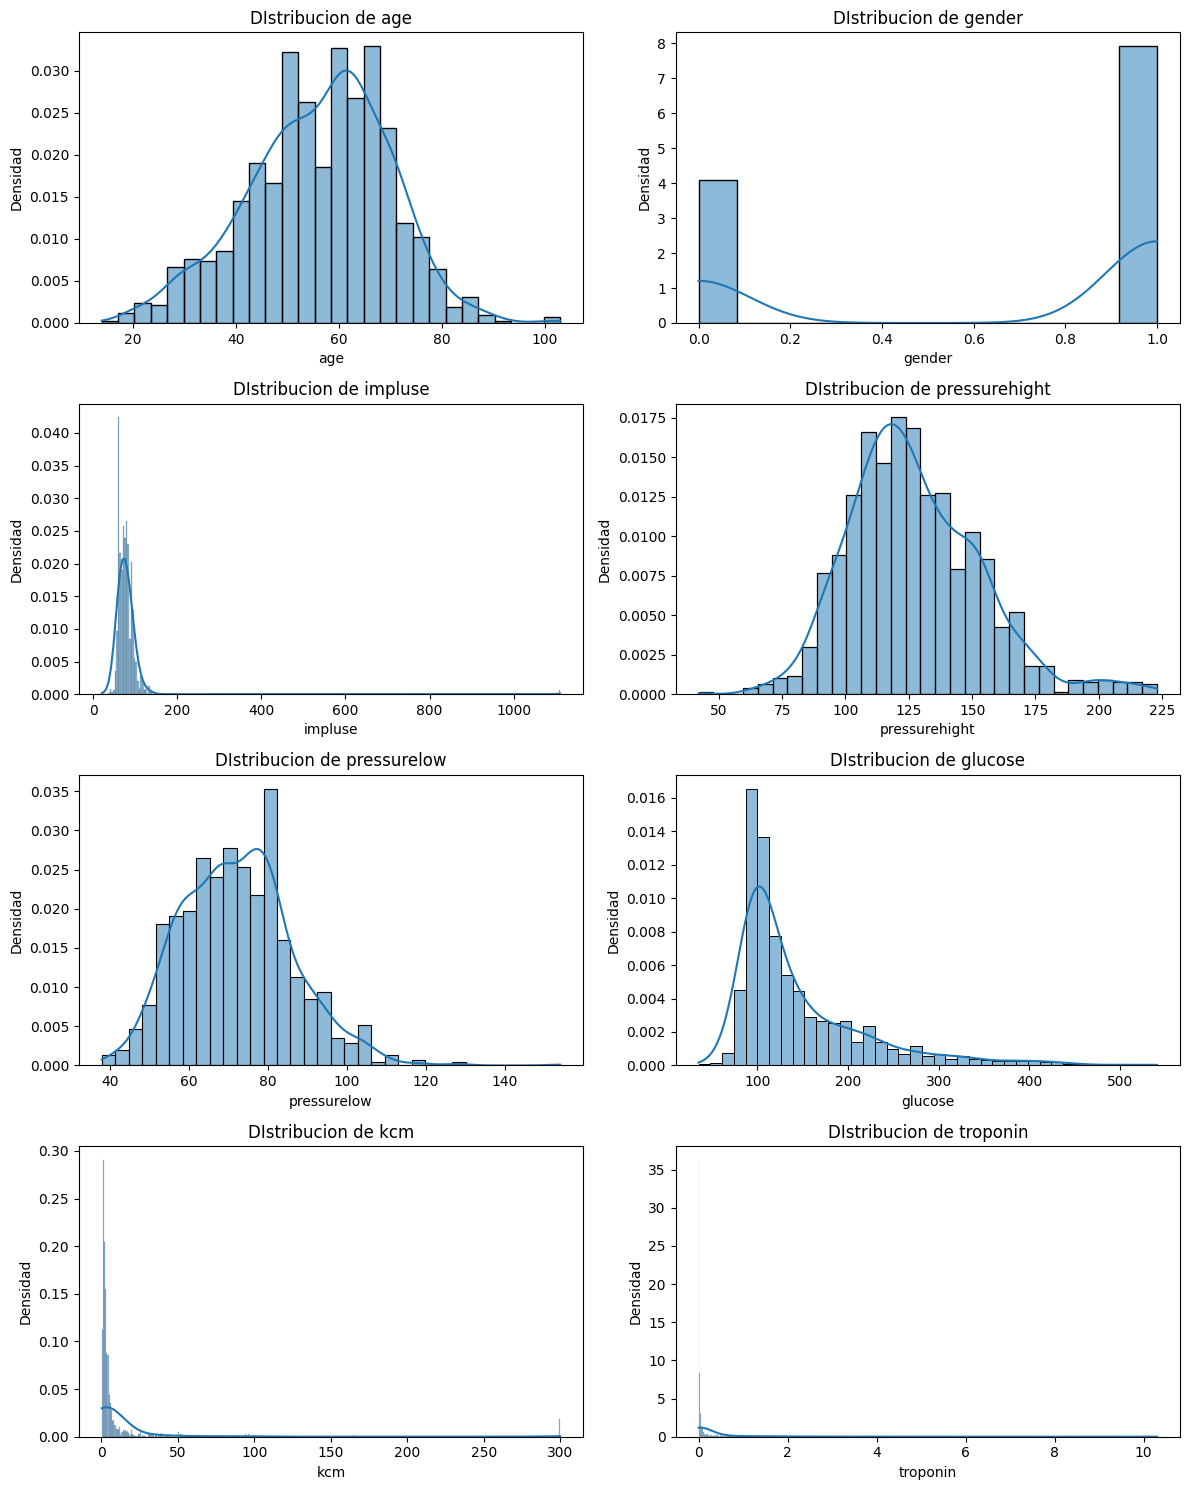

In [51]:
lst  = df.columns
plt.figure(figsize =  (12,15))

for i, var in enumerate (lst,1):
    plt.subplot(4,2,i)
    sns.histplot(df[var], kde = True, stat = 'density')
    plt.title(f'DIstribucion de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

### Podemos ver ourliers en ciertas variables como 'impluse', 'kcm', 'troponin'

In [52]:
lst_out = ['impluse', 'kcm','troponin']

In [53]:
df[lst_out].describe([0.01,0.1, 0.25, 0.50, 0.75,0.8,0.85,0.90,0.94,0.95,0.99])

,impluse,kcm,troponin
count,1319.000000,1319.000000,1319.000000
mean,78.336619,15.274306,0.360942
std,51.630270,46.327083,1.154568
min,20.000000,0.321000,0.001000
1%,51.000000,0.518340,0.003000
10%,60.000000,1.130000,0.003000
25%,64.000000,1.655000,0.006000
50%,74.000000,2.850000,0.014000
75%,85.000000,5.805000,0.085500
80%,89.000000,7.654000,0.191400


In [54]:
df[df['impluse'] > df['impluse'].quantile(0.99)]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
21,48,1,135,98,60,100.0,94.79,0.004
63,45,1,1111,141,95,109.0,1.33,1.010
346,60,1,134,111,69,163.0,3.08,0.025
457,65,1,132,125,74,196.0,1.42,0.004
682,68,1,135,98,60,96.0,254.40,0.025
717,70,0,1111,141,95,138.0,3.87,0.028
836,50,1,132,125,74,133.0,3.18,0.354
842,63,1,134,111,69,132.0,44.18,0.065
1012,65,1,135,98,60,162.0,7.67,0.025
1069,32,0,1111,141,95,82.0,2.66,0.008


In [55]:
df[df['kcm'] > df['kcm'].quantile(0.9)]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
7,63,1,60,214,82,87.0,300.00,2.370
21,48,1,135,98,60,100.0,94.79,0.004
23,30,1,63,110,68,107.0,50.46,0.003
24,50,1,63,104,63,269.0,38.72,0.612
28,47,0,66,134,57,279.0,300.00,0.007
...,...,...,...,...,...,...,...,...
1275,42,0,100,119,66,163.0,50.46,0.003
1276,54,1,100,117,57,98.0,38.72,0.007
1280,31,1,72,117,49,184.0,300.00,0.005
1309,47,1,94,105,81,135.0,36.24,0.263


In [56]:
df[df['troponin'] > df['troponin'].quantile(0.85)]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
1,21,1,94,98,46,296.0,6.75,1.060
7,63,1,60,214,82,87.0,300.00,2.370
12,64,1,60,199,99,92.0,3.43,5.370
16,86,0,73,114,68,87.0,1.11,0.776
24,50,1,63,104,63,269.0,38.72,0.612
...,...,...,...,...,...,...,...,...
1300,43,1,90,95,50,118.0,1.33,0.544
1305,47,1,71,117,61,140.0,4.39,1.370
1310,70,0,80,135,75,351.0,2.21,10.000
1316,45,1,85,168,104,96.0,1.24,4.250


In [57]:
df = df[df['troponin'] < df['troponin'].quantile(0.85)]
df = df[df['kcm'] <= df['kcm'].quantile(0.9)]
df = df[df['impluse'] < df['impluse'].quantile(0.99)]

In [58]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
5,58,0,61,112,58,87.0,1.83,0.004
...,...,...,...,...,...,...,...,...
1312,48,1,84,118,68,96.0,5.33,0.006
1313,86,0,40,179,68,147.0,5.22,0.011
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172


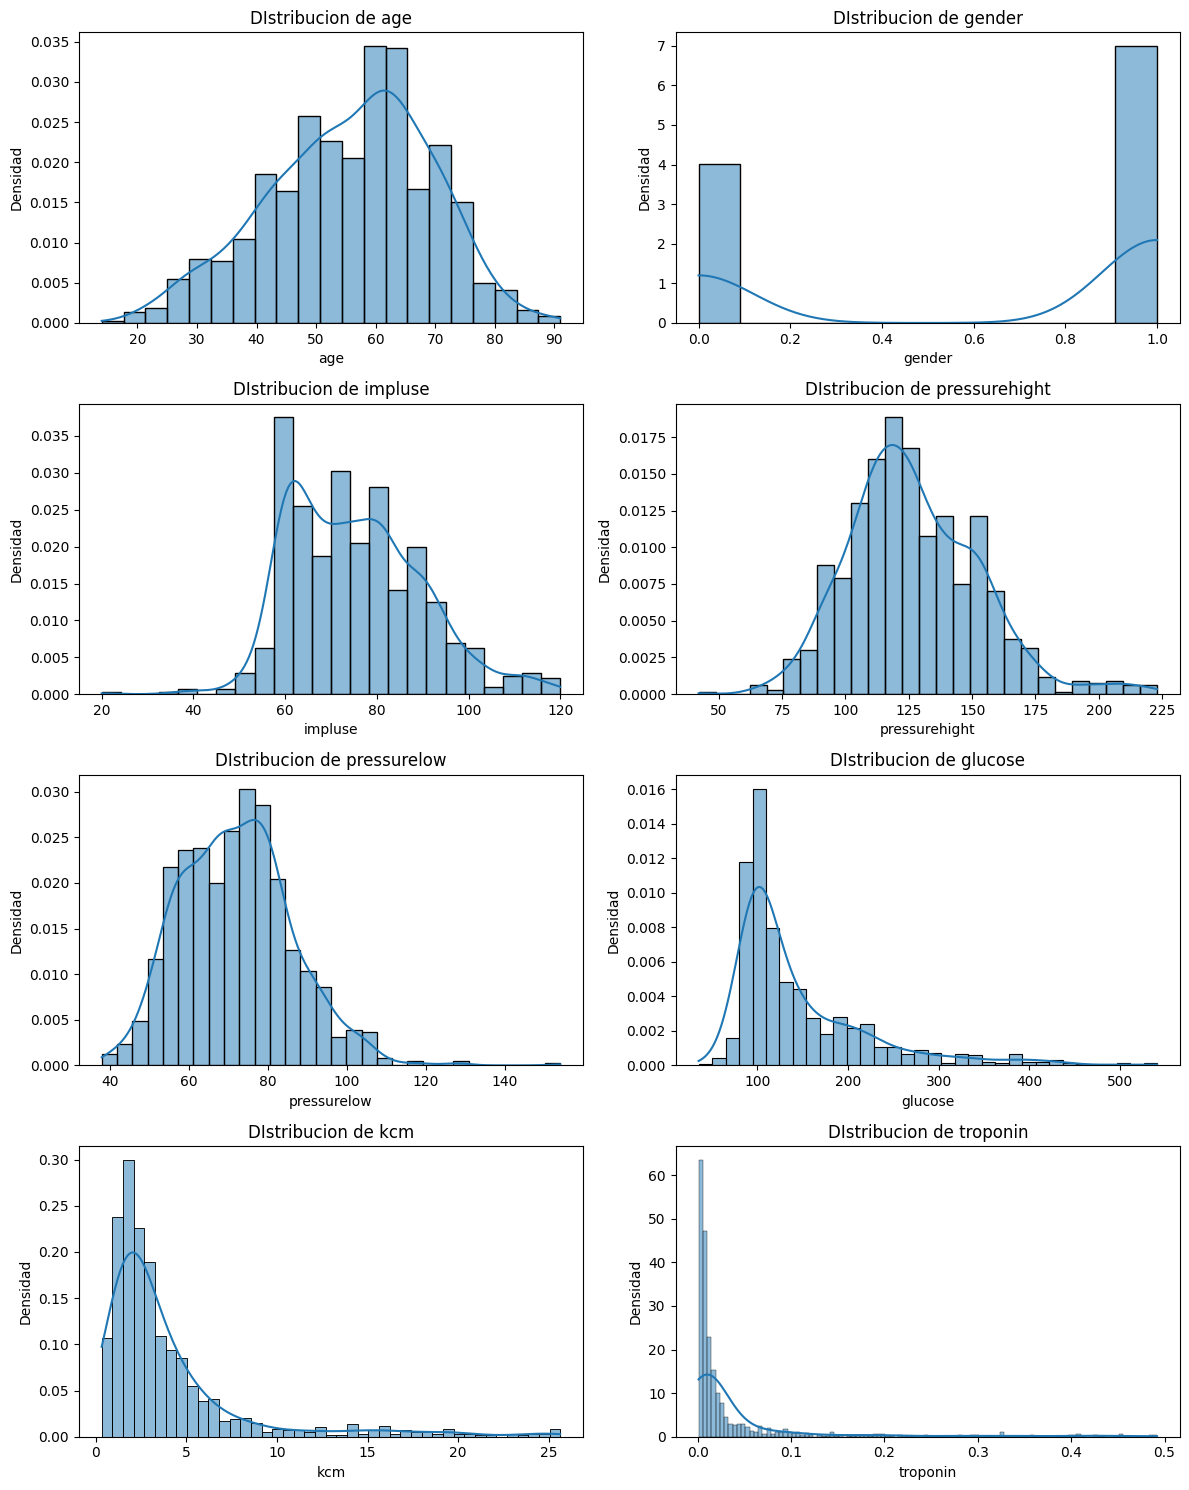

In [59]:
plt.figure(figsize =  (12,15))

for i, var in enumerate (lst,1):
    plt.subplot(4,2,i)
    sns.histplot(df[var], kde = True, stat = 'density')
    plt.title(f'DIstribucion de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

In [60]:
df[lst]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
5,58,0,61,112,58,87.0,1.83,0.004
...,...,...,...,...,...,...,...,...
1312,48,1,84,118,68,96.0,5.33,0.006
1313,86,0,40,179,68,147.0,5.22,0.011
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172


### Despues de realizar la eliminacion de ciertos outliers nos quedamos con 998 datos, a pesar de que algunas variables aun muestran outliers decidi parar para no perder demasiada informacion

[]

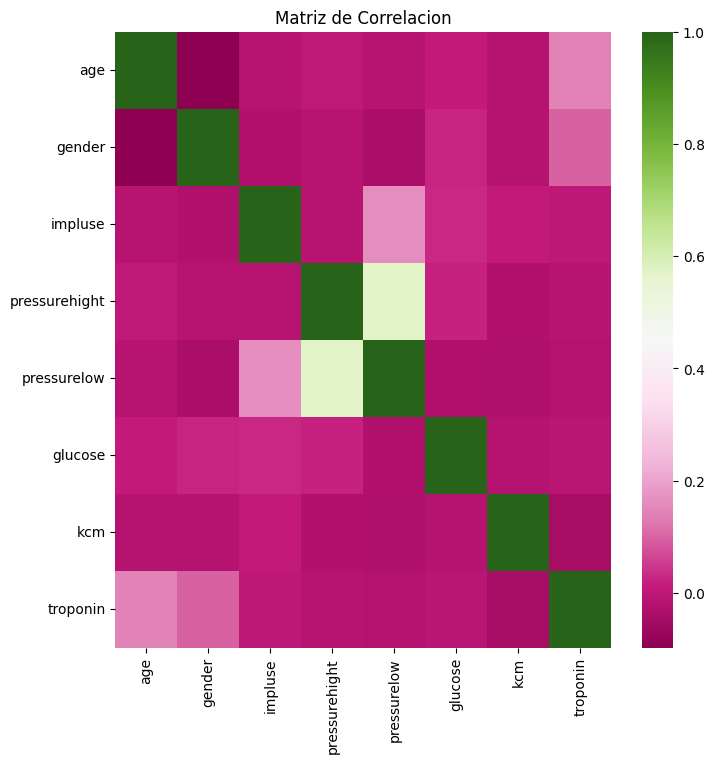

In [61]:
mtrx_corr = df[lst].corr()
plt.figure(figsize = (8,8))
plt.title('Matriz de Correlacion')
sns.heatmap(mtrx_corr, cmap='PiYG')
plt.plot()

### Podemos ver que las relaciones lineales son practicamente nulas, por lo que pasareos de PCA y aplicaremos otros MDS y t-SNE

In [62]:
mds_m_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mds', MDS(n_components=2, metric= True, random_state=random_seed))    
    ])

In [63]:
tsne_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, perplexity= 40, random_state=random_seed))    
])

In [64]:
mds_nm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mds', MDS(n_components=2, metric= False, random_state=random_seed))    
])

In [65]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
5,58,0,61,112,58,87.0,1.83,0.004
...,...,...,...,...,...,...,...,...
1312,48,1,84,118,68,96.0,5.33,0.006
1313,86,0,40,179,68,147.0,5.22,0.011
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172


In [66]:
X_mds_m = mds_m_pipe.fit_transform(df)
X_mds_nm = mds_nm_pipe.fit_transform(df)
X_tsne = tsne_pipe.fit_transform(df)

[]

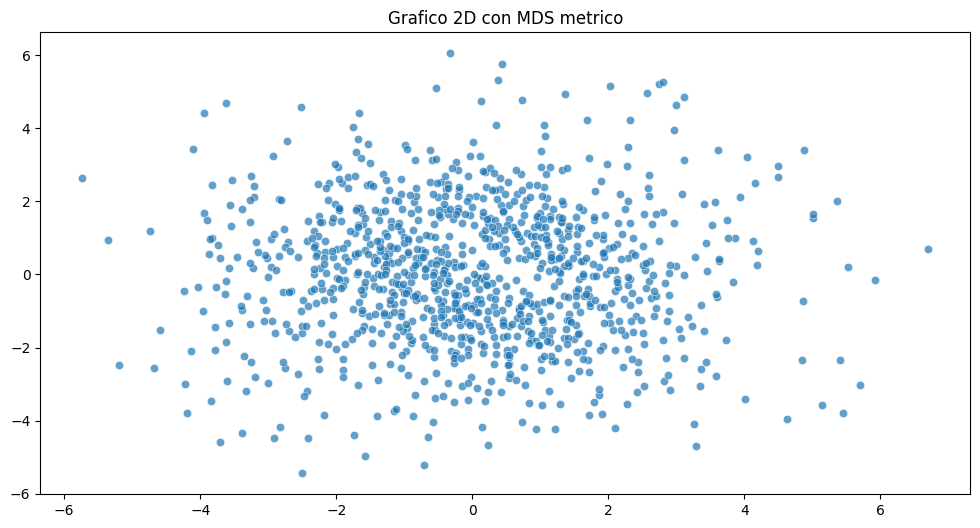

In [67]:
plt.figure(figsize = (12,6))
plt.title('Grafico 2D con MDS metrico')
sns.scatterplot(
    x = X_mds_m[:,0],
    y = X_mds_m[:,1],
    alpha = 0.7,
)
plt.plot()

[]

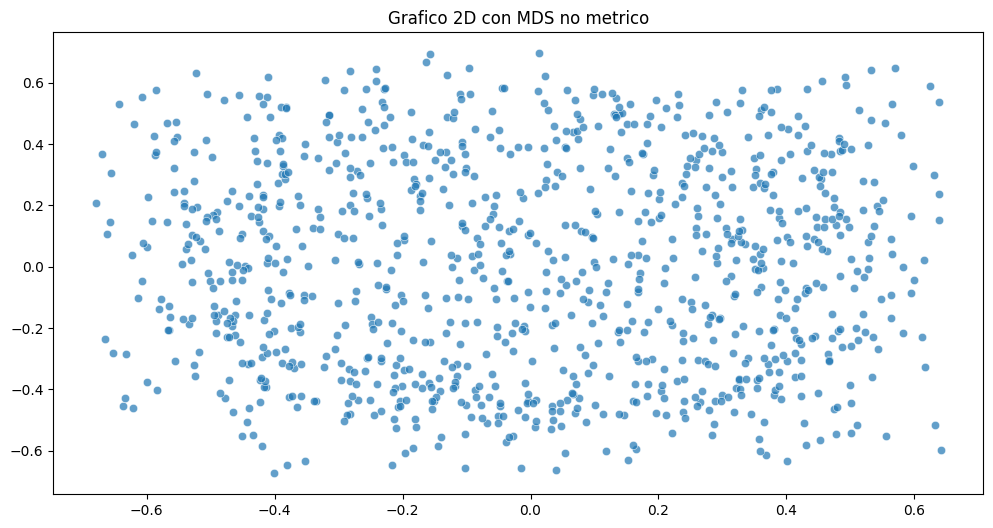

In [68]:
plt.figure(figsize = (12,6))
plt.title('Grafico 2D con MDS no metrico')
sns.scatterplot(
    x = X_mds_nm[:,0],
    y = X_mds_nm[:,1],
    alpha = 0.7,
)
plt.plot()

[]

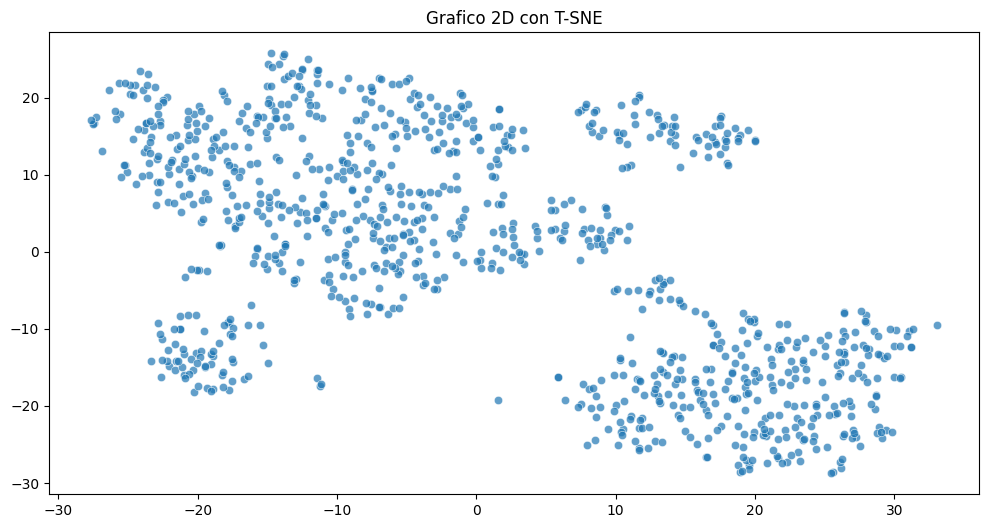

In [69]:
plt.figure(figsize = (12,6))
plt.title('Grafico 2D con T-SNE')
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    alpha = 0.7,
)
plt.plot()

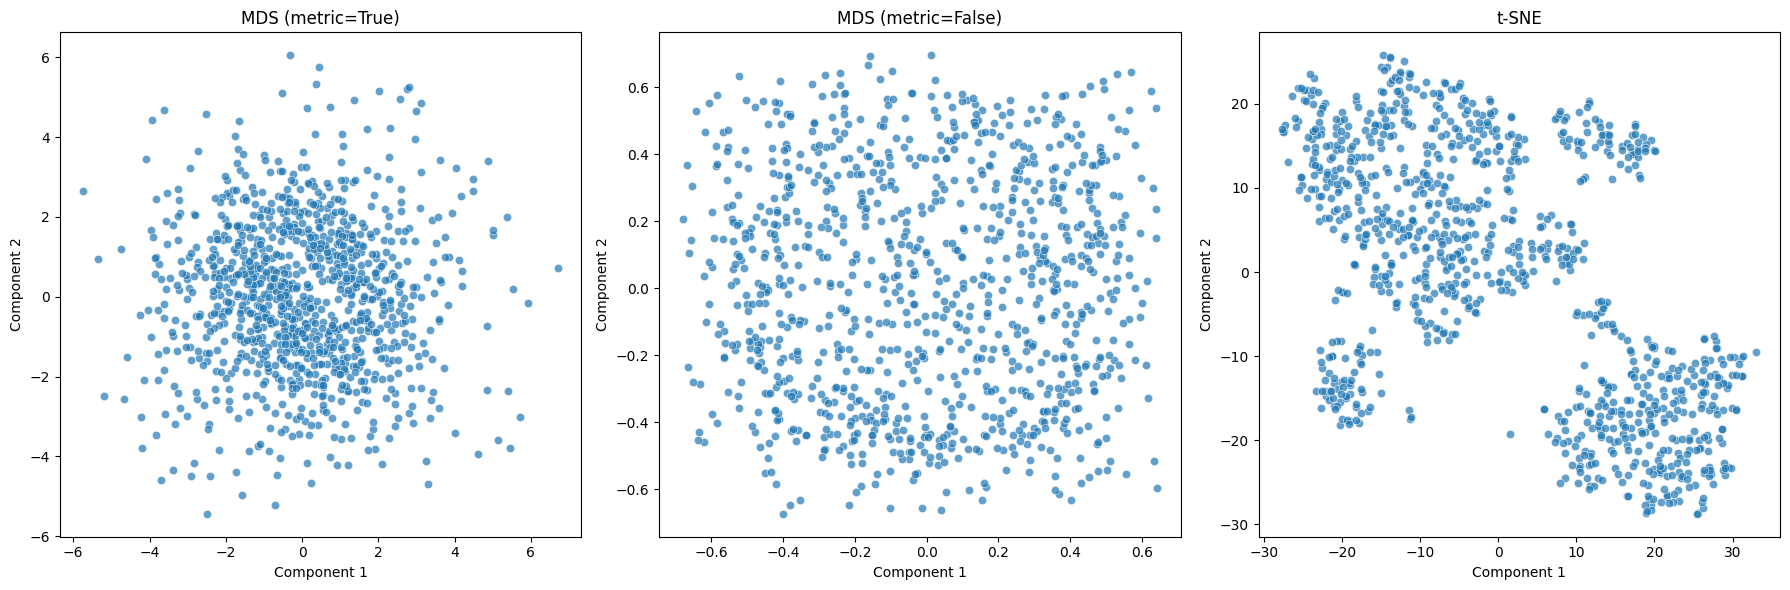

In [70]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(
    x=X_mds_m[:, 0], 
    y=X_mds_m[:, 1],
    ax=axes[0],
    alpha=0.7
)
axes[0].set_title('MDS (metric=True)')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

sns.scatterplot(
    x=X_mds_nm[:, 0], 
    y=X_mds_nm[:, 1],
    ax=axes[1],
    alpha=0.7
)
axes[1].set_title('MDS (metric=False)')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')


sns.scatterplot(
    x=X_tsne[:, 0], 
    y=X_tsne[:, 1],
    ax=axes[2],
    alpha=0.7
)
axes[2].set_title('t-SNE')
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

### Al graficar las tres tecnicas de reduccion de dimensionalidades, podemos ver que T-SNE es el que muestra una mejor separacion de elementos, por lo que seguiremos con esta tecnica

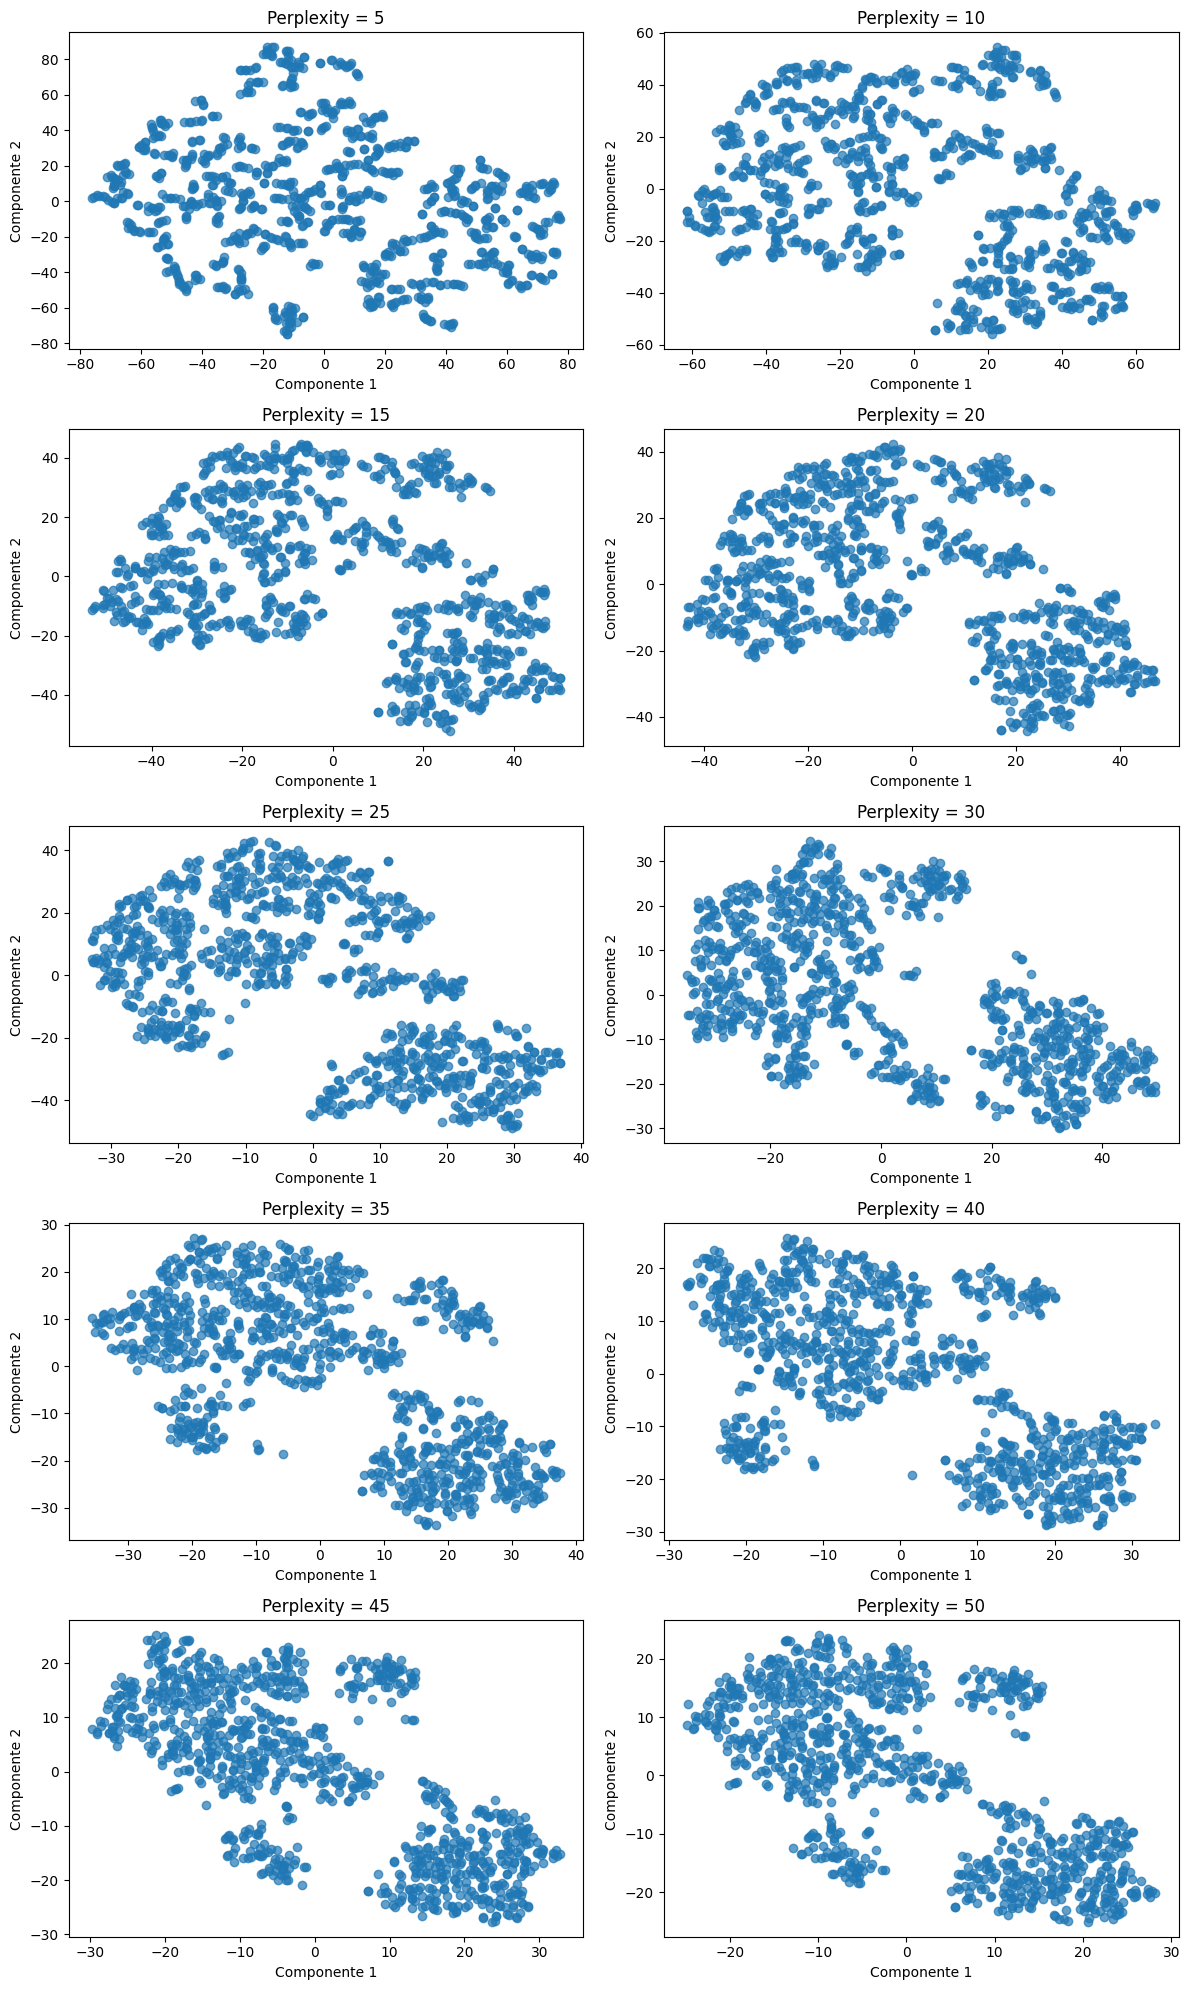

In [71]:
fig, axes = plt.subplots(5,2,figsize=(12,20))
axes = axes.flatten()

val  = [5,10,15,20,25,30,35,40,45,50]

for i , v in enumerate(val):
    
    tsne_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('tsne', TSNE(n_components=2 , perplexity = v, random_state=333))    
    ])
    X_tsne = tsne_pipe.fit_transform(df)
    
    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
    axes[i].set_title(f'Perplexity = {v}')
    axes[i].set_xlabel('Componente 1')
    axes[i].set_ylabel('Componente 2')
    plt.tight_layout()
    plt.plot()

### Probamos el T-SNE con diferentes valores de Perplexity para ver cual es el mas optimo

[]

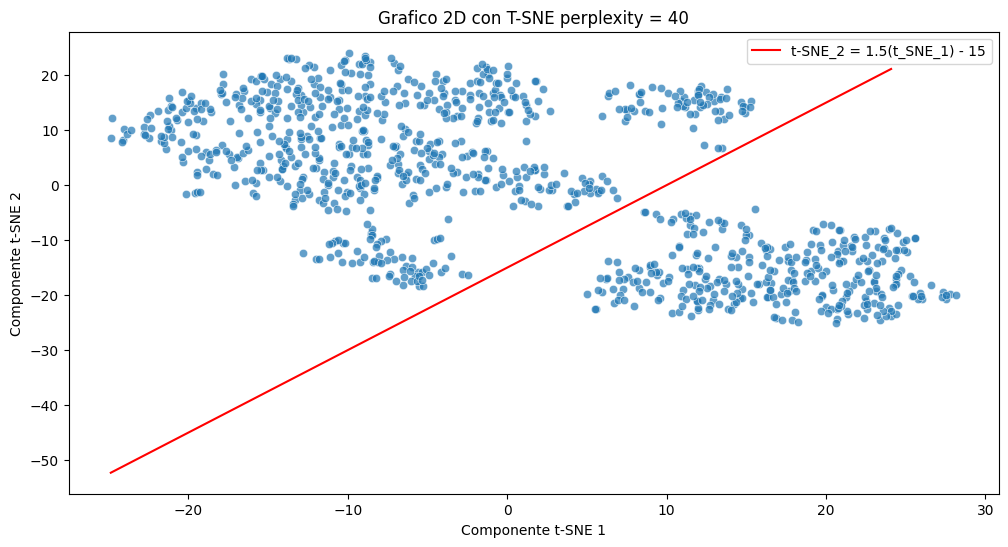

In [72]:
plt.figure(figsize = (12,6))
plt.title('Grafico 2D con T-SNE perplexity = 40')
sns.scatterplot(
    x = X_tsne[:,0],
    y = X_tsne[:,1],
    alpha = 0.7,
)

x_vals = np.linspace(X_tsne[:,0].min(), X_tsne[:,1].max(),200)
y_vals = 1.5*x_vals - 15
plt.plot(x_vals, y_vals, color = 'red', linestyle = '-', label = 't-SNE_2 = 1.5(t_SNE_1) - 15')


plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.legend()
plt.plot()

### Al ver la distribucion de los cliusters se ve que estos son linealmente separables, por lo que aplique una funcion lineal que despues fui ajustando graficamente.

In [73]:
clusters = division_clusters(X_tsne,1.5 ,-15)

In [74]:
df['cluster'] = clusters

In [75]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,cluster
0,64,1,66,160,83,160.0,1.80,0.012,1
2,55,1,64,160,77,270.0,1.99,0.003,1
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,1
5,58,0,61,112,58,87.0,1.83,0.004,0
...,...,...,...,...,...,...,...,...,...
1312,48,1,84,118,68,96.0,5.33,0.006,1
1313,86,0,40,179,68,147.0,5.22,0.011,0
1314,44,1,94,122,67,204.0,1.63,0.006,1
1315,66,1,84,125,55,149.0,1.33,0.172,1


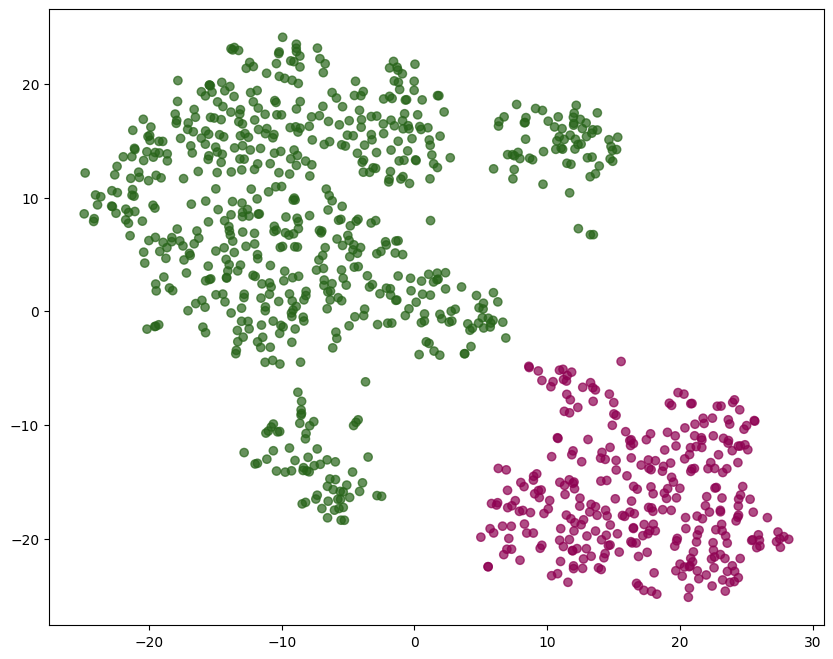

In [76]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='PiYG', alpha=0.7)
# Comprobamos la distribucion de los clusters

In [77]:
pd.set_option('display.max_columns', None)

In [78]:
df.groupby('cluster').describe()

age                                                      gender  \
         count       mean        std   min   25%   50%    75%   max  count   
cluster                                                                      
0        322.0  57.307453  14.130518  14.0  48.0  60.0  69.75  90.0  322.0   
1        676.0  54.755917  13.319255  19.0  45.0  56.0  65.00  91.0  676.0   

                                                    impluse             \
            mean       std  min  25%  50%  75%  max   count       mean   
cluster                                                                  
0        0.00000  0.000000  0.0  0.0  0.0  0.0  0.0   322.0  75.928571   
1        0.93787  0.241571  0.0  1.0  1.0  1.0  1.0   676.0  75.187870   

                                                  pressurehight              \
               std   min   25%   50%   75%    max         count        mean   
cluster                                                                       
0        14.433148  40.0  63.0  75.0  85.0  120.0         322.0  127.841615   
1        14.329206  20.0  64.0  74.0  84.0  119.0         676.0  126.513314   

                                                       pressurelow             \
               std   min     25%    50%     75%    max       count       mean   
cluster                                                                         
0        26.382103  67.0  110.25  125.0  144.00  223.0       322.0  72.804348   
1        25.763393  42.0  109.00  123.0  143.25  223.0       676.0  71.729290   

                                                   glucose              \
               std   min    25%   50%   75%    max   count        mean   
cluster                                                                  
0        13.589976  41.0  62.25  71.0  81.0  128.0   322.0  143.728882   
1        14.374744  38.0  61.00  71.0  80.0  154.0   676.0  148.023669   

                                                        kcm            \
               std   min   25%    50%     75%    max  count      mean   
cluster                                                                 
0        73.992119  50.0  96.0  114.0  165.75  500.0  322.0  2.938220   
1        78.137008  35.0  98.0  115.0  180.25  541.0  676.0  4.560534   

                                                       troponin            \
              std    min     25%    50%     75%    max    count      mean   
cluster                                                                     
0        2.034721  0.321  1.5475  2.320  3.7150  11.40    322.0  0.018025   
1        4.991464  0.345  1.6500  2.785  4.8475  25.63    676.0  0.051749   

                                                      
              std    min    25%    50%    75%    max  
cluster                                               
0        0.026201  0.002  0.004  0.008  0.017  0.188  
1        0.098463  0.001  0.005  0.012  0.037  0.492

### Al analizar los datos podemos ver ciertas diferenicas en las medias de variables como gender, glucose, kcm, y troponin

In [79]:
df[df['cluster'] == df['gender']] # Podemos ver que la clusterizacion practicamente pertenece a el genero

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,cluster
0,64,1,66,160,83,160.0,1.80,0.012,1
2,55,1,64,160,77,270.0,1.99,0.003,1
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,1
5,58,0,61,112,58,87.0,1.83,0.004,0
...,...,...,...,...,...,...,...,...,...
1312,48,1,84,118,68,96.0,5.33,0.006,1
1313,86,0,40,179,68,147.0,5.22,0.011,0
1314,44,1,94,122,67,204.0,1.63,0.006,1
1315,66,1,84,125,55,149.0,1.33,0.172,1


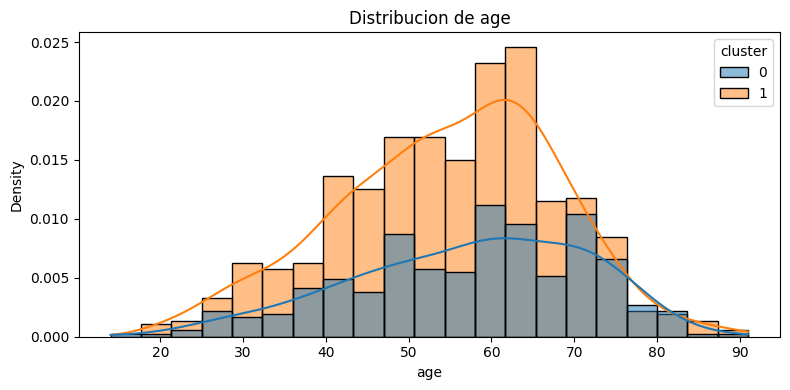

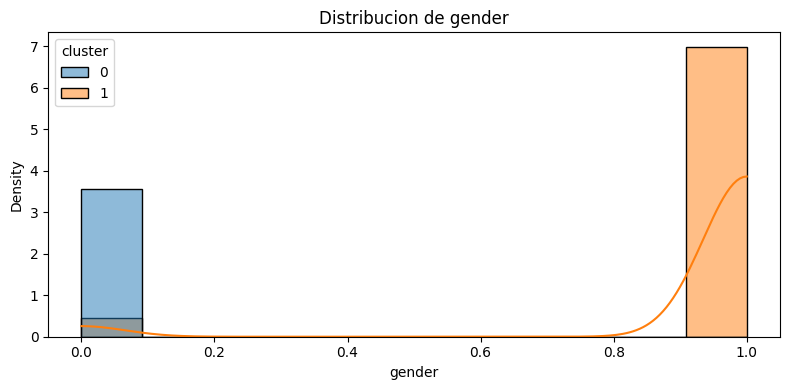

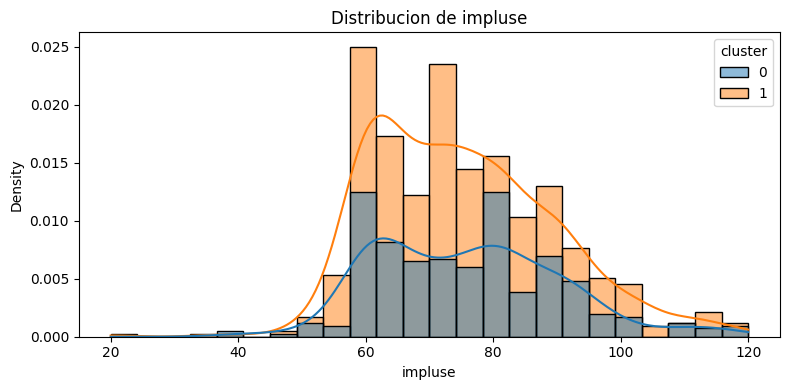

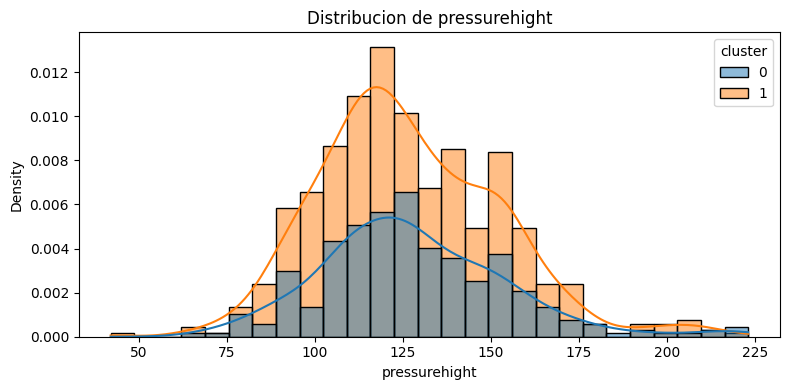

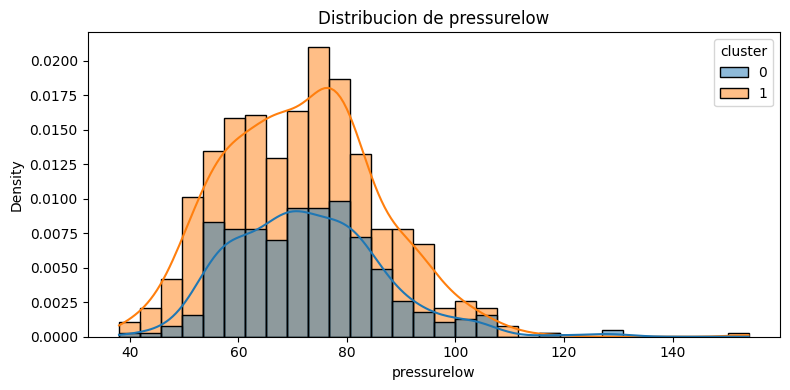

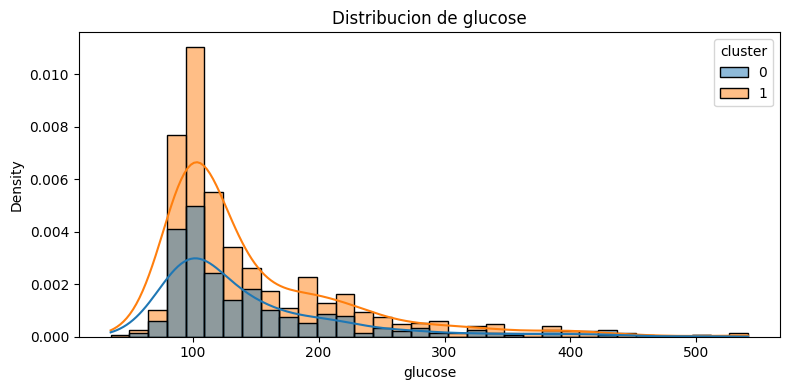

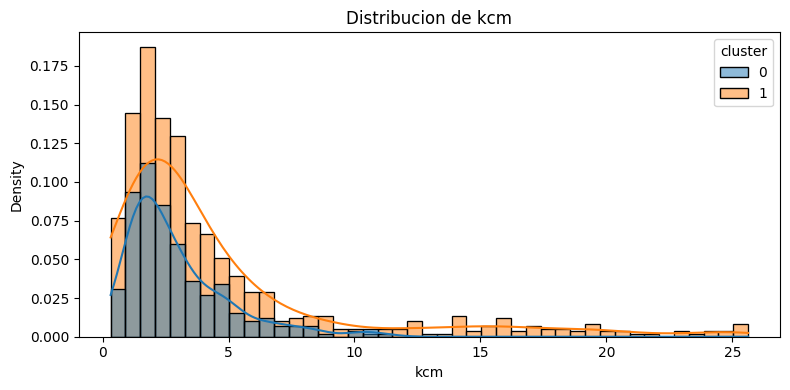

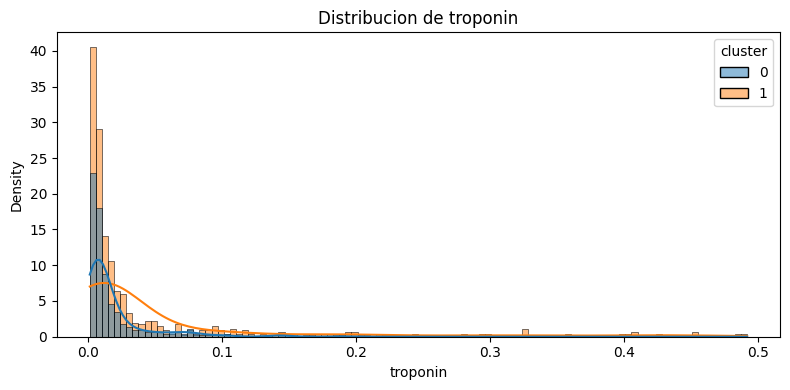

In [80]:
for var in df.select_dtypes(include = 'number').columns:
    if var not in ['cluster']:
        plt.figure(figsize=(8,4))
        sns.histplot(data = df, x = var, hue = 'cluster', kde = True, stat = 'density')
        plt.title(f'Distribucion de {var}')
        plt.tight_layout()
        plt.show()

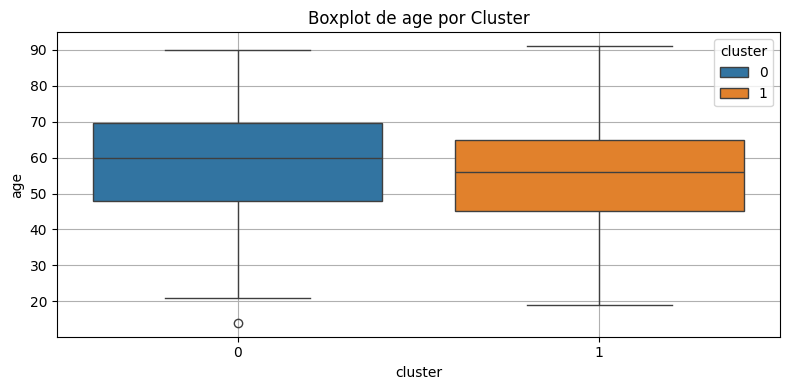

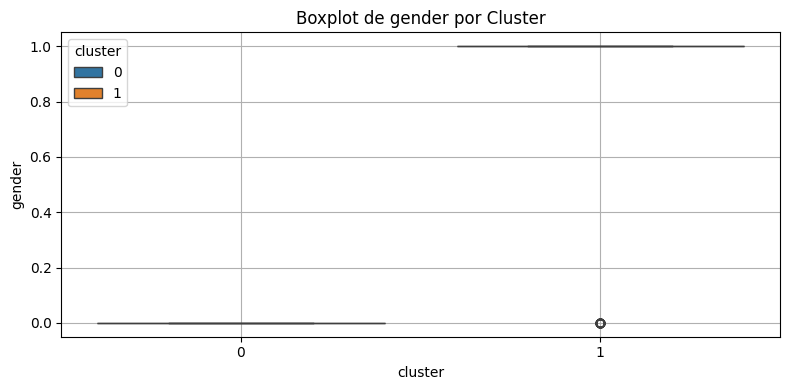

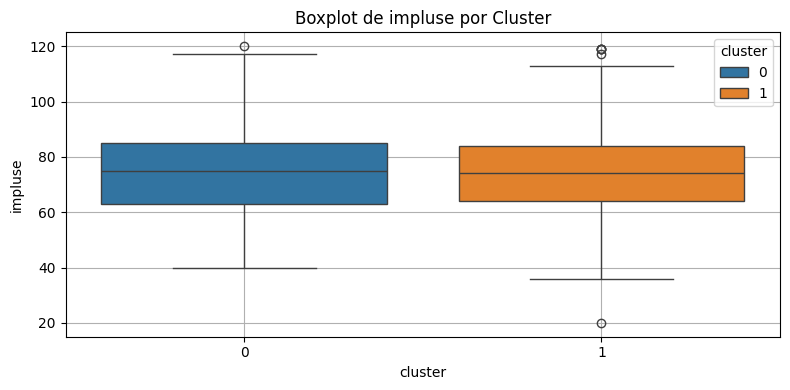

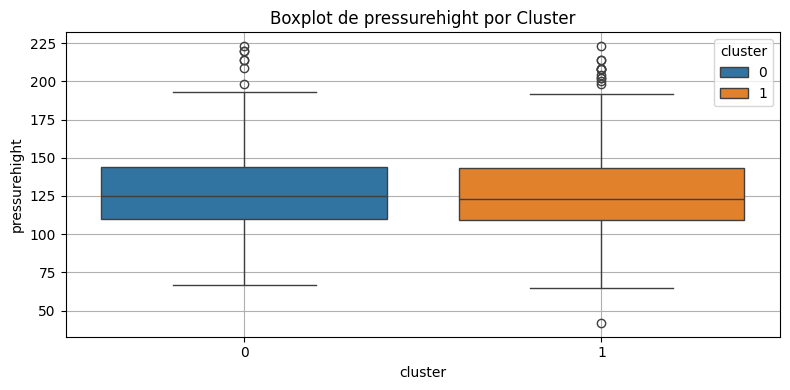

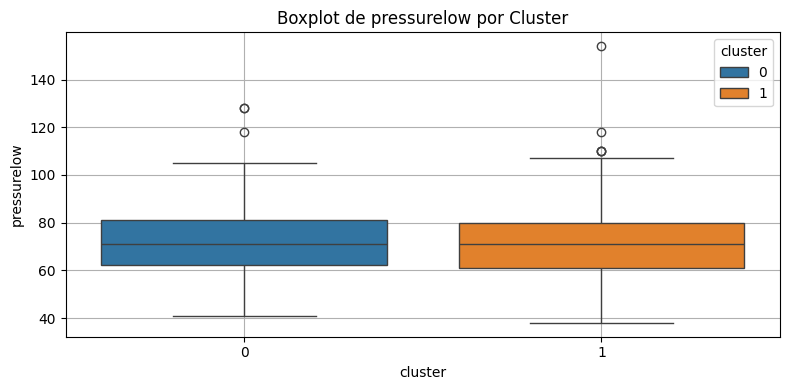

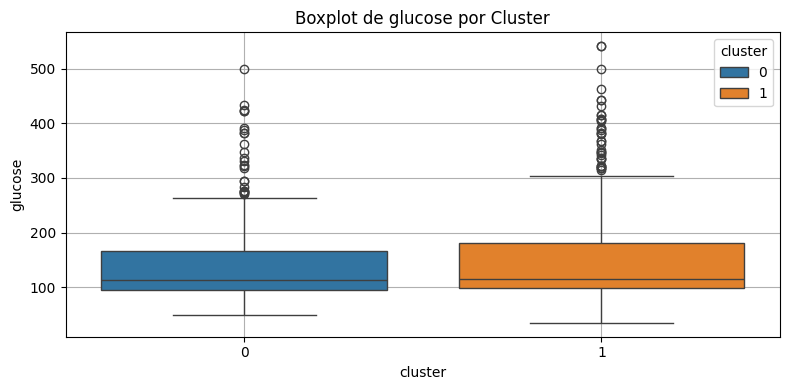

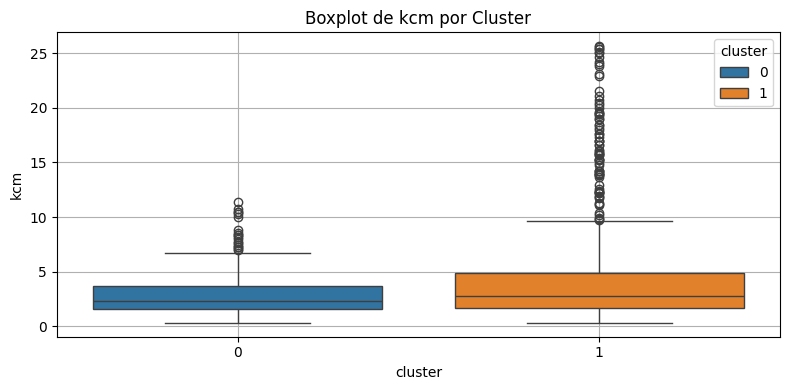

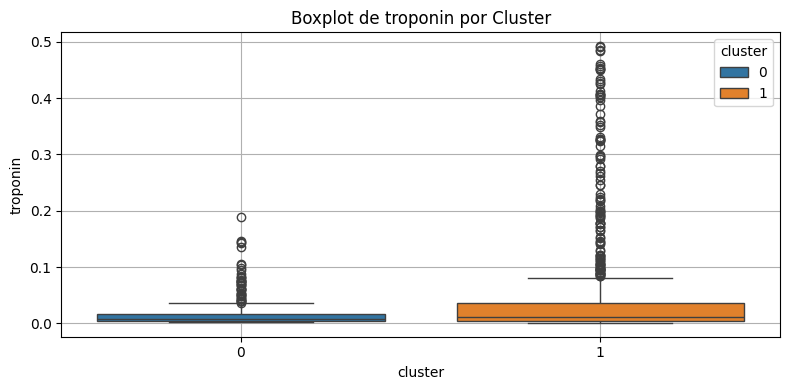

In [81]:
for var in df.select_dtypes(include='number').columns:
    if var not in ['cluster']:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x='cluster', y=var, hue='cluster')
        plt.title(f'Boxplot de {var} por Cluster')
        plt.tight_layout()
        plt.grid(True)
        plt.show()

### Al analizar las graficas con histogramas y Boxplots, podemos ver que en realidad las diferencias en las medias no parecer ser tan drasticas y notorias, por otro lado el genero si que parece corresponderr con cada cliuster

In [83]:
len(df[df['cluster'] == df['gender']]) / len(df) # 95% de los resultados de los clusters corresponden a el genero

0.9579158316633266